In [1]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, Bidirectional
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import np_utils
#sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


12
362237


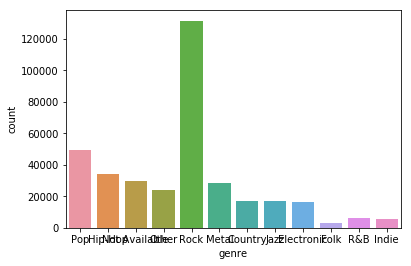

In [4]:
df = pd.read_pickle('../data/lyrics.pkl', compression='gzip')
print(len(set(list(df.genre))))
print(len(df))
sns.countplot(df.genre)

In [5]:
#probably a better way to do this
df = df[(df.genre == 'Pop') | (df.genre == 'Hip-Hop') | (df.genre == 'Metal') | (df.genre == 'Rock')]
df.dropna(inplace=True)
df.groupby('genre').nunique('genre')

,index,song,year,artist,genre,lyrics
genre,,,,,,
Hip-Hop,24850,21479,32,1107,1,22648
Metal,23759,21852,33,996,1,22498
Pop,40466,32443,47,2066,1,37229
Rock,109235,85240,48,3765,1,102512


8000


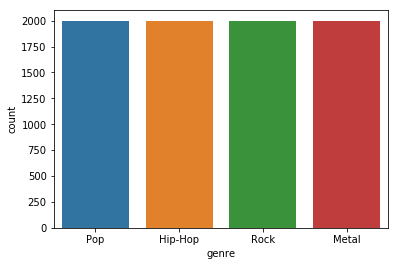

In [6]:
#also probably a better way to do this using 28408 because that is the smallest count
import matplotlib.pyplot as plt
pop = df.loc[df['genre']=='Pop'].head(2000)
hiphop = df.loc[df['genre']=='Hip-Hop'].head(2000)
rock = df.loc[df['genre']=='Rock'].head(2000)
metal = df.loc[df['genre']=='Metal'].head(2000)
#really ratchet
output = pop.append(hiphop)
output = output.append(rock)
output = output.append(metal)
output.dropna(inplace=True)
output.reset_index(drop=True, inplace=True)
print(len(output))
#but it works...
t = sns.countplot(output.genre)
plt.savefig('dataset.png')

# preprocess data
-  make our 10 word sequences integer encoded
- use one-hot encoding to encode our genres

creating our feature set w/Keras tokenizer class

In [8]:
#this value is the length of the longest song in our dataset.
MAX_VALUE = 8196
tok = Tokenizer(num_words=MAX_VALUE)
tok.fit_on_texts(df.lyrics)
#build sequences
sequences = tok.texts_to_sequences(output.lyrics)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=MAX_VALUE)
len(sequences_matrix)

8000

creating our target variables

In [9]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(output.genre)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### split into test/train 80/20 split

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,onehot_encoded,test_size=0.2)

In [20]:
model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [22]:
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
optimizer = RMSprop(lr=0.001)


In [22]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 165us/step - loss: 11.8995 - acc: 0.2564 - val_loss: 11.8336 - val_acc: 0.2575
Epoch 2/100
6400/6400 [==============================] - 1s 118us/step - loss: 11.8395 - acc: 0.2594 - val_loss: 11.8740 - val_acc: 0.2525
Epoch 3/100
6400/6400 [==============================] - 1s 118us/step - loss: 11.8278 - acc: 0.2591 - val_loss: 11.8218 - val_acc: 0.2550
Epoch 4/100
6400/6400 [==============================] - 1s 119us/step - loss: 11.6438 - acc: 0.2708 - val_loss: 11.3283 - val_acc: 0.2875
Epoch 5/100
6400/6400 [==============================] - 1s 120us/step - loss: 11.2223 - acc: 0.2953 - val_loss: 11.1604 - val_acc: 0.2913
Epoch 6/100
6400/6400 [==============================] - 1s 120us/step - loss: 11.2619 - acc: 0.2945 - val_loss: 11.0392 - val_acc: 0.3063
Epoch 7/100
6400/6400 [==============================] - 1s 119us/step - loss: 11.2086 - acc: 0.2966 - val_loss: 11.25

6400/6400 [==============================] - 1s 125us/step - loss: 11.1942 - acc: 0.3009 - val_loss: 11.3206 - val_acc: 0.2925
Epoch 60/100
6400/6400 [==============================] - 1s 128us/step - loss: 11.1791 - acc: 0.3017 - val_loss: 11.2081 - val_acc: 0.2938
Epoch 61/100
6400/6400 [==============================] - 1s 123us/step - loss: 11.1030 - acc: 0.3056 - val_loss: 11.1560 - val_acc: 0.2975
Epoch 62/100
6400/6400 [==============================] - 1s 125us/step - loss: 11.1623 - acc: 0.3016 - val_loss: 11.2521 - val_acc: 0.2969
Epoch 63/100
6400/6400 [==============================] - 1s 127us/step - loss: 11.1637 - acc: 0.3014 - val_loss: 11.1600 - val_acc: 0.3031
Epoch 64/100
6400/6400 [==============================] - 1s 125us/step - loss: 11.1579 - acc: 0.3011 - val_loss: 11.0982 - val_acc: 0.3063
Epoch 65/100
6400/6400 [==============================] - 1s 123us/step - loss: 11.1372 - acc: 0.3034 - val_loss: 11.0238 - val_acc: 0.3113
Epoch 66/100
6400/6400 [=========

In [24]:
model.evaluate(x=X_train, y=Y_train, verbose=1)

6400/6400 [==============================] - 1s 88us/step


[11.161810691356658, 0.303125]

In [11]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=50, input_length=10))
model.add(Flatten())
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

NameError: name 'X_train' is not defined

In [15]:
optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True)


Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 198us/step - loss: 9.8636 - acc: 0.3794 - val_loss: 9.6278 - val_acc: 0.3931
Epoch 2/100
6400/6400 [==============================] - 1s 118us/step - loss: 9.3117 - acc: 0.4116 - val_loss: 9.3721 - val_acc: 0.4131
Epoch 3/100
6400/6400 [==============================] - 1s 119us/step - loss: 9.1654 - acc: 0.4255 - val_loss: 9.3954 - val_acc: 0.4138
Epoch 4/100
6400/6400 [==============================] - 1s 121us/step - loss: 9.0853 - acc: 0.4309 - val_loss: 9.4592 - val_acc: 0.4094
Epoch 5/100
6400/6400 [==============================] - 1s 121us/step - loss: 9.1526 - acc: 0.4273 - val_loss: 9.4346 - val_acc: 0.4094
Epoch 6/100
6400/6400 [==============================] - 1s 120us/step - loss: 9.1669 - acc: 0.4261 - val_loss: 9.4519 - val_acc: 0.4088
Epoch 7/100
6400/6400 [==============================] - 1s 121us/step - loss: 9.1744 - acc: 0.4263 - val_loss: 9.3984 - val_acc: 

KeyboardInterrupt: 

In [10]:
model.evaluate(x=X_train, y=Y_train, verbose=1)


NameError: name 'model' is not defined

In [77]:
df.iloc[0].lyrics


['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'im', 'gonna', 'cut']

In [ ]:
hello world my name is Amit
h e
he l
hel l
hell o